# Summarizing metrics from disturbed horizontal lines

Leanne Friedrich 11/15/22

## initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [3]:
import os
import sys
sys.path.append("../")
sys.path.append("../../")
from py.tools.config import cfg
import py.tools.logs as logs
from plainIm import plainIm
import matplotlib.pyplot as plt
import py.metric_plots as mp
import py.metrics_disturb as me
import regression as rg
import matplotlib.cm as cm
LOGGERDEFINED = logs.openLog('summary_horiz.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

## analyzing data

In [49]:
ms = me.metricDisturbSummary(os.path.join(cfg.path.fig, 'singleDisturb', 'horizDisturbSummaries.csv')
                             , diag=True)

Independents: ['printFolder', 'bn', 'date', 'sigma', 'fluFile', 'calibFile', 'spacing', 'vRatio', 'dEst', 'viscRatio', 'rGrav', 'int_Re', 'ReRatio', 'hDragP', 'vDragP', 'int_CaInv', 'pressureCh0', 'ink_shortname', 'ink_days', 'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val', 'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_density', 'ink_v', 'ink_rate', 'ink_visc0', 'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_dPR', 'ink_dnormInv', 'ink_Bm', 'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant', 'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0', 'sup_eta0', 'sup_density', 'sup_v', 'sup_rate', 'sup_visc0', 'sup_CaInv', 'sup_Re', 'sup_WeInv', 'sup_OhInv', 'sup_dPR', 'sup_dnormInv', 'sup_Bm']

Dependents: ['delta_segments', 'delta_roughness', 'delta_totlen_n', 'delta_meanT_n', 'delta_yc_n', 'w_dy0l', 'd_dy0l', 'd_dy0r', 'd_dy0lr', 'd_space_b']


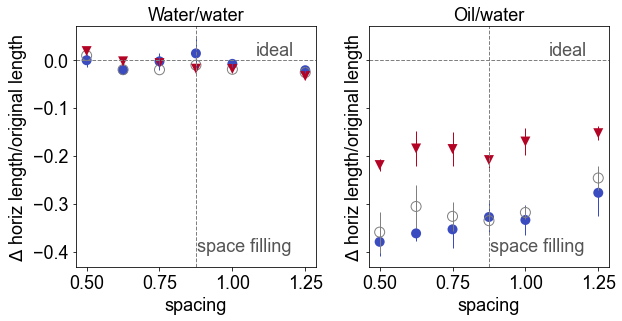

In [32]:
fig,axs = plt.subplots(1,2,figsize=(9,6), sharey=True, sharex=True)
fs = 18
ms.ss.sort_values(by=['sigma', 'sup_val'], inplace=True)
for i,sigma in enumerate(ms.ss.sigma.unique()):
    mp.scatterSS(ms, ms.ss[ms.ss.sigma==sigma], 'spacing', 'delta_totlen_n', 'sup_val'
             ,fig=fig, ax=axs[i], logx=False, yideal=(0), xideal=0.875, fontsize=fs, markersize=100, legend=False)
for ax in axs:
    mp.setSquare(ax)
    ax.text(0.88, -0.4, 'space filling', color='#555555', fontsize=fs)
    ax.text(1.08, 0.01, 'ideal', color='#555555', fontsize=fs)
axs[0].set_title('Water/water', fontsize=fs)
axs[1].set_title('Oil/water', fontsize=fs)
fig.tight_layout()
fig.savefig(os.path.join(cfg.path.fig, 'singleDisturb', 'figures', 'change_lengths.svg'), bbox_inches='tight', dpi=300)

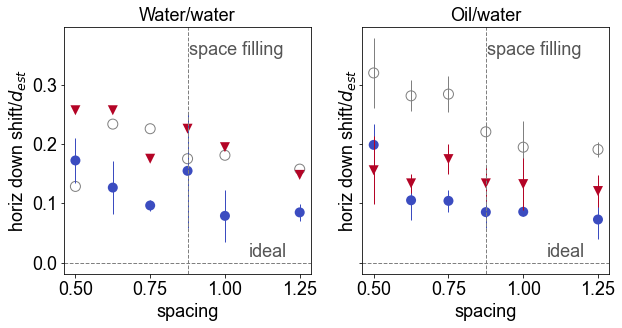

In [51]:
fig,axs = plt.subplots(1,2,figsize=(9,6), sharey=True, sharex=True)
fs = 18
ms.ss.sort_values(by=['sigma', 'sup_val'], inplace=True)
for i,sigma in enumerate(ms.ss.sigma.unique()):
    mp.scatterSS(ms, ms.ss[ms.ss.sigma==sigma], 'spacing', 'delta_yc_n', 'sup_val'
             ,fig=fig, ax=axs[i], logx=False, yideal=(0), xideal=0.875, fontsize=fs, markersize=100, legend=False)
for ax in axs:
    mp.setSquare(ax)
    ax.text(0.88, 0.35, 'space filling', color='#555555', fontsize=fs)
    ax.text(1.08, 0.01, 'ideal', color='#555555', fontsize=fs)
axs[0].set_title('Water/water', fontsize=fs)
axs[1].set_title('Oil/water', fontsize=fs)
fig.tight_layout()
fig.savefig(os.path.join(cfg.path.fig, 'singleDisturb', 'figures', 'horiz_shift.svg'), bbox_inches='tight', dpi=300)

In [48]:
ms.ss[(ms.ss.delta_yc_n>0.3)&(ms.ss.ink_base=='mineral oil')&(ms.ss.sup_val==4)]

,printFolder,bn,date,sigma,fluFile,calibFile,spacing,vRatio,dEst,viscRatio,...,w_dy0l,w_dy0l_SE,d_dy0l,d_dy0l_SE,d_dy0r,d_dy0r_SE,d_dy0lr,d_dy0lr_SE,d_space_b,d_space_b_SE
56,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_M8_S_4.00_220930,220930.0,42.1,True,True,0.75,1.0,0.6,0.07,...,1.63,0.01,1.11,0.06,0.52,0.08,-0.6,0.14,0.4,0.07
